In [1]:
import numpy as np   # for array stuff
import scipy as sp   # for optimization
import pylab as pl   # for plotting stuff

In [2]:
import scipy.optimize as op  # parameter optimisation

In [3]:
import emcee         # mcmc sampler

In [17]:
x = np.arange(0.,100.,0.1)
#sigma = 10.*np.ones(len(x))
sigma = 1.*(x+1)

In [18]:
m = 5.
c = 5.
a = 0.1

p = np.array([a,m,c])

In [19]:
def model(p,x):
    
    a,m,c = p
    y = a*x**2 - m*x + c
    
    return y

In [20]:
y_true = model(p,x)
y_meas = y_true + np.random.normal(0,sigma)

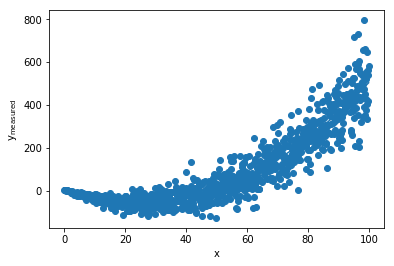

In [21]:
pl.scatter(x,y_meas)
pl.plot(x,y_true)
pl.xlabel("x")
pl.ylabel(r"y$_{\rm measured}$")
pl.show()

In [9]:
def ll(p,x,y,sigma):
    
    y_try = model(p,x)
    diff = y_try - y
    
    ll = -0.5*np.sum(diff**2/sigma**2)
    
    return ll

In [10]:
initial = np.array([1.,1.,1.])

------

Method 1: Direct optimisation

In [11]:
nll = lambda *args: -ll(*args)

result = op.minimize(nll, initial, args=(x, y_meas, sigma))
a, m, c = result["x"]

In [12]:
print result

      fun: 482.94548559080283
 hess_inv: array([[1.80041525e-07, 1.79870092e-05, 2.99227436e-04],
       [1.79870092e-05, 1.91700675e-03, 3.58894926e-02],
       [2.99227436e-04, 3.58894926e-02, 8.96796830e-01]])
      jac: array([-7.62939453e-06,  0.00000000e+00, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([0.10051117, 5.05231612, 5.89715686])


In [22]:
y_fit = model(result["x"],x)

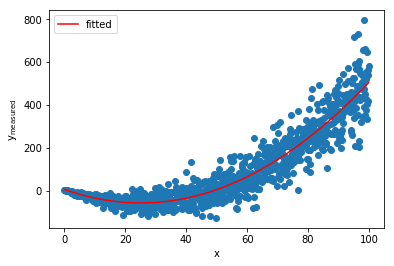

In [25]:
pl.scatter(x,y_meas)
pl.plot(x,y_fit,c='r',label="fitted")
pl.xlabel("x")
pl.ylabel(r"y$_{\rm measured}$")
pl.legend()
pl.show()

----

Method 2: Markov Chain Monte Carlo (MCMC)

In [13]:
ndim, nwalkers = len(initial), 10
p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, ll, args=(x,y_meas,sigma))

In [14]:
print("Running burn-in...")
p0,_,_ = sampler.run_mcmc(p0, 1000)
sampler.reset()

Running burn-in...


In [15]:
print("Running production...")
sampler.run_mcmc(p0, 3000)

Running production...


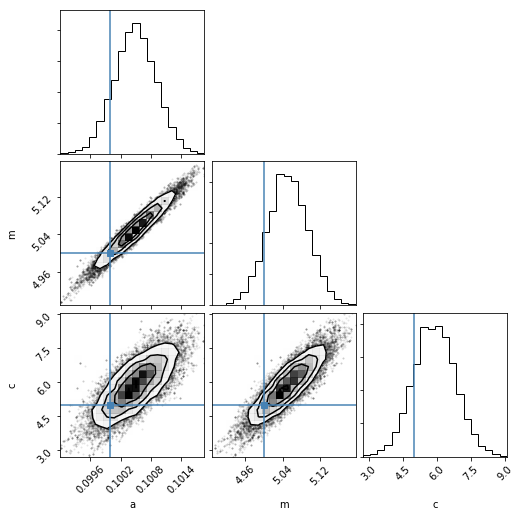

In [16]:
import corner

tri_labels = [r"a", r"m", r"c"]
tri_truths = [0.1,5.,5.]
tri_range = [(0, 1.), (0, 10), (0, 10)]
inds = np.array([0,1,2])
corner.corner(sampler.flatchain[:, inds], truths=tri_truths, labels=tri_labels);